# Working on Pandas

- Intro
- loc, iloc
- Assemble
- Missing Values
- Tidy data
- Data types
- Spelling Mistake
- Apply
- Group by
- Stats models
- Vectorize function

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

# 1) Introduction to basics

In [3]:
df=pd.read_csv('gapminder.tsv', delimiter='\t')

In [4]:
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.shape

(1704, 6)

Shape is an attribute so no parenthesis. If it were function or method then we might use shape()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
country      1704 non-null object
continent    1704 non-null object
year         1704 non-null int64
lifeExp      1704 non-null float64
pop          1704 non-null int64
gdpPercap    1704 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


In [8]:
country_df = df['country']
country_df.head()

0    Afghanistan
1    Afghanistan
2    Afghanistan
3    Afghanistan
4    Afghanistan
Name: country, dtype: object

In [9]:
type(country_df)

pandas.core.series.Series

In [10]:
df2=df[['country', 'continent', 'year']].head()
df2.head()

,country,continent,year
0,Afghanistan,Asia,1952
1,Afghanistan,Asia,1957
2,Afghanistan,Asia,1962
3,Afghanistan,Asia,1967
4,Afghanistan,Asia,1972


In [11]:
type(df2)

pandas.core.frame.DataFrame

check how dataframe is created with [[]] and series with []

Plus we have multiple columns in dataframe. 

In [12]:
df.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

### 1a)- how to delecte columns and rows

In [13]:
del df['country']

In [14]:
df.head()

,continent,year,lifeExp,pop,gdpPercap
0,Asia,1952,28.801,8425333,779.445314
1,Asia,1957,30.332,9240934,820.853030
2,Asia,1962,31.997,10267083,853.100710
3,Asia,1967,34.020,11537966,836.197138
4,Asia,1972,36.088,13079460,739.981106


In [15]:
df = df.drop('continent', axis=1)

In [16]:
df.head()

,year,lifeExp,pop,gdpPercap
0,1952,28.801,8425333,779.445314
1,1957,30.332,9240934,820.853030
2,1962,31.997,10267083,853.100710
3,1967,34.020,11537966,836.197138
4,1972,36.088,13079460,739.981106


In [17]:
# removing rows
df=df.drop(4, axis=0)

In [18]:
df.head()

,year,lifeExp,pop,gdpPercap
0,1952,28.801,8425333,779.445314
1,1957,30.332,9240934,820.853030
2,1962,31.997,10267083,853.100710
3,1967,34.020,11537966,836.197138
5,1977,38.438,14880372,786.113360


### 1b)-loc and iloc

In [20]:
# back to original df
df=pd.read_csv('gapminder.tsv', delimiter='\t')

In [21]:
df.loc[0] # showing all 1st row values by labels

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap        779.445
Name: 0, dtype: object

In [22]:
## 100th row by label
df.loc[99]

country      Bangladesh
continent          Asia
year               1967
lifeExp          43.453
pop            62821884
gdpPercap       721.186
Name: 99, dtype: object

In [23]:
# showing position of row by position
df.iloc[0]

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap        779.445
Name: 0, dtype: object

In [24]:
df.iloc[99]

country      Bangladesh
continent          Asia
year               1967
lifeExp          43.453
pop            62821884
gdpPercap       721.186
Name: 99, dtype: object

In [25]:
df.iloc[-1]

country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object

In [26]:
df.iloc[[0 , 99, 999]]

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
99,Bangladesh,Asia,1967,43.453,62821884,721.186086
999,Mongolia,Asia,1967,51.253,1149500,1226.041130


In [27]:
# Combing rows and columns
df.iloc[[0, 99, 999], [0, 3, 5]]

,country,lifeExp,gdpPercap
0,Afghanistan,28.801,779.445314
99,Bangladesh,43.453,721.186086
999,Mongolia,51.253,1226.041130


In [28]:
le_mean = df['lifeExp'].mean()

In [29]:
le_mean

59.47443936619713

In [30]:
df.loc[df['lifeExp'] > le_mean, :].head()

,country,continent,year,lifeExp,pop,gdpPercap
14,Albania,Europe,1962,64.82,1728137,2312.888958
15,Albania,Europe,1967,66.22,1984060,2760.196931
16,Albania,Europe,1972,67.69,2263554,3313.422188
17,Albania,Europe,1977,68.93,2509048,3533.003910
18,Albania,Europe,1982,70.42,2780097,3630.880722


### 1c)-Use groupby

In [31]:
df=pd.read_csv('gapminder.tsv', delimiter='\t')

In [32]:
df.groupby('year')

In [33]:
df.groupby('year')['lifeExp'].mean()

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [34]:
df.groupby('year')[['lifeExp', 'gdpPercap']].mean()

,lifeExp,gdpPercap
year,,
1952,49.057620,3725.276046
1957,51.507401,4299.408345
1962,53.609249,4725.812342
1967,55.678290,5483.653047
1972,57.647386,6770.082815
1977,59.570157,7313.166421
1982,61.533197,7518.901673
1987,63.212613,7900.920218
1992,64.160338,8158.608521


**In this case, year is acting as index and other two features are showing values against it**

In [35]:
df.\
  groupby(['year', 'continent'])[['lifeExp', 'gdpPercap']].\
  mean()

lifeExp     gdpPercap
year continent                         
1952 Africa     39.135500   1252.572466
     Americas   53.279840   4079.062552
     Asia       46.314394   5195.484004
     Europe     64.408500   5661.057435
     Oceania    69.255000  10298.085650
1957 Africa     41.266346   1385.236062
     Americas   55.960280   4616.043733
     Asia       49.318544   5787.732940
     Europe     66.703067   6963.012816
     Oceania    70.295000  11598.522455
1962 Africa     43.319442   1598.078825
     Americas   58.398760   4901.541870
     Asia       51.563223   5729.369625
     Europe     68.539233   8365.486814
     Oceania    71.085000  12696.452430
1967 Africa     45.334538   2050.363801
     Americas   60.410920   5668.253496
     Asia       54.663640   5971.173374
     Europe     69.737600  10143.823757
     Oceania    71.310000  14495.021790
1972 Africa     47.450942   2339.615674
     Americas   62.394920   6491.334139
     Asia       57.319269   8187.468699
     Europe     70.775033  12479.575246
     Oceania    71.910000  16417.333380
1977 Africa     49.580423   2585.938508
     Americas   64.391560   7352.007126
     Asia       59.610556   7791.314020
     Europe     71.937767  14283.979110
     Oceania    72.855000  17283.957605
1982 Africa     51.592865   2481.592960
     Americas   66.228840   7506.737088
     Asia       62.617939   7434.135157
     Europe     72.806400  15617.896551
     Oceania    74.290000  18554.709840
1987 Africa     53.344788   2282.668991
     Americas   68.090720   7793.400261
     Asia       64.851182   7608.226508
     Europe     73.642167  17214.310727
     Oceania    75.320000  20448.040160
1992 Africa     53.629577   2281.810333
     Americas   69.568360   8044.934406
     Asia       66.537212   8639.690248
     Europe     74.440100  17061.568084
     Oceania    76.945000  20894.045885
1997 Africa     53.598269   2378.759555
     Americas   71.150480   8889.300863
     Asia       68.020515   9834.093295
     Europe     75.505167  19076.781802
     Oceania    78.190000  24024.175170
2002 Africa     53.325231   2599.385159
     Americas   72.422040   9287.677107
     Asia       69.233879  10174.090397
     Europe     76.700600  21711.732422
     Oceania    79.740000  26938.778040
2007 Africa     54.806038   3089.032605
     Americas   73.608120  11003.031625
     Asia       70.728485  12473.026870
     Europe     77.648600  25054.481636
     Oceania    80.719500  29810.188275

**An example of multi-indexing**

In [36]:
(df.
  groupby(['year', 'continent'])[['lifeExp', 'gdpPercap']].
  mean()
).reset_index()

,year,continent,lifeExp,gdpPercap
0,1952,Africa,39.135500,1252.572466
1,1952,Americas,53.279840,4079.062552
2,1952,Asia,46.314394,5195.484004
3,1952,Europe,64.408500,5661.057435
4,1952,Oceania,69.255000,10298.085650
5,1957,Africa,41.266346,1385.236062
6,1957,Americas,55.960280,4616.043733
7,1957,Asia,49.318544,5787.732940
8,1957,Europe,66.703067,6963.012816
9,1957,Oceania,70.295000,11598.522455


**Back to index value**

In [37]:
df.groupby('continent')['country'].nunique()

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64

In [38]:
gyle = df.groupby('year')['lifeExp'].mean()
gyle

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

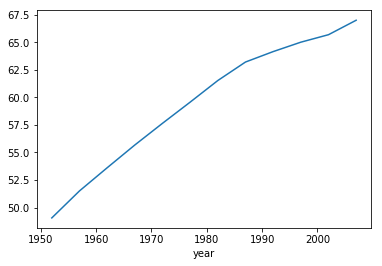

In [39]:
gyle.plot()

In [40]:
df_new = gyle.reset_index()

In [41]:
df_new.head()

,year,lifeExp
0,1952,49.057620
1,1957,51.507401
2,1962,53.609249
3,1967,55.678290
4,1972,57.647386


In [42]:
df_new.to_csv('lifeExp_by_year.csv', index=False)

# 2)-Assemble

In [44]:
df1 = pd.read_csv('concat_1.csv')
df2 = pd.read_csv('concat_2.csv')
df3 = pd.read_csv('concat_3.csv')

In [45]:
df1

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3


In [46]:
df2

,A,B,C,D
0,a4,b4,c4,d4
1,a5,b5,c5,d5
2,a6,b6,c6,d6
3,a7,b7,c7,d7


In [47]:
df3

,A,B,C,D
0,a8,b8,c8,d8
1,a9,b9,c9,d9
2,a10,b10,c10,d10
3,a11,b11,c11,d11


### 2a) concatenate rows

In [48]:
row_concat = pd.concat([df1, df2, df3])

In [49]:
row_concat

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
0,a4,b4,c4,d4
1,a5,b5,c5,d5
2,a6,b6,c6,d6
3,a7,b7,c7,d7
0,a8,b8,c8,d8
1,a9,b9,c9,d9


In [50]:
row_concat.loc[0]

,A,B,C,D
0,a0,b0,c0,d0
0,a4,b4,c4,d4
0,a8,b8,c8,d8


In [51]:
row_concat.iloc[0]

A    a0
B    b0
C    c0
D    d0
Name: 0, dtype: object

loc shows index 0 and iloc shows 1st row's values

In [52]:
# create a new row to concatenate
new_row = pd.Series(['n1', 'n2', 'n3', 'n4'])
new_row

0    n1
1    n2
2    n3
3    n4
dtype: object

In [53]:
pd.concat([df1, new_row])

,A,B,C,D,0
0,a0,b0,c0,d0,NaN
1,a1,b1,c1,d1,NaN
2,a2,b2,c2,d2,NaN
3,a3,b3,c3,d3,NaN
0,NaN,NaN,NaN,NaN,n1
1,NaN,NaN,NaN,NaN,n2
2,NaN,NaN,NaN,NaN,n3
3,NaN,NaN,NaN,NaN,n4


It does not make much of sense. As we didnt mention of columns

In [54]:
                          # note the double brackets
new_row_2 = pd.DataFrame([['n1', 'n2', 'n3', 'n4']],
                        columns = ['A', 'B', 'D', 'C'])
new_row_2

,A,B,D,C
0,n1,n2,n3,n4


In [56]:
pd.concat([df1, new_row_2], sort=False)

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
0,n1,n2,n4,n3


In [57]:
new_row_3 = pd.DataFrame([['n1', 'n2', 'n3']],
                        columns = ['A', 'B', 'D'])
new_row_3

,A,B,D
0,n1,n2,n3


In [58]:
pd.concat([df1, new_row_3], sort=False)

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
0,n1,n2,NaN,n3


### 2b)-Concatenate Columns

In [59]:
col_concat = pd.concat([df1, df3, df3], axis=1)
col_concat

,A,B,C,D,A,B,C,D,A,B,C,D
0,a0,b0,c0,d0,a8,b8,c8,d8,a8,b8,c8,d8
1,a1,b1,c1,d1,a9,b9,c9,d9,a9,b9,c9,d9
2,a2,b2,c2,d2,a10,b10,c10,d10,a10,b10,c10,d10
3,a3,b3,c3,d3,a11,b11,c11,d11,a11,b11,c11,d11


### 2c)-Concatenation with different indicies

In [60]:
df1.columns = ['A', 'B', 'C', 'D']
df2.columns = ['E', 'F', 'G', 'H']
df3.columns = ['A', 'C', 'F', 'H']

In [62]:
pd.concat([df1, df2, df3], sort=False)

,A,B,C,D,E,F,G,H
0,a0,b0,c0,d0,NaN,NaN,NaN,NaN
1,a1,b1,c1,d1,NaN,NaN,NaN,NaN
2,a2,b2,c2,d2,NaN,NaN,NaN,NaN
3,a3,b3,c3,d3,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,a4,b4,c4,d4
1,NaN,NaN,NaN,NaN,a5,b5,c5,d5
2,NaN,NaN,NaN,NaN,a6,b6,c6,d6
3,NaN,NaN,NaN,NaN,a7,b7,c7,d7
0,a8,NaN,b8,NaN,NaN,c8,NaN,d8
1,a9,NaN,b9,NaN,NaN,c9,NaN,d9


In [63]:
df1.index = range(4)      # 0 to 3 inclusive
df2.index = range(4, 8)   # 4 to 7 inclusive
df3.index = [0, 2, 5, 7]

In [64]:
df1

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3


In [65]:
df2

,E,F,G,H
4,a4,b4,c4,d4
5,a5,b5,c5,d5
6,a6,b6,c6,d6
7,a7,b7,c7,d7


In [66]:
df3

,A,C,F,H
0,a8,b8,c8,d8
2,a9,b9,c9,d9
5,a10,b10,c10,d10
7,a11,b11,c11,d11


### 2d)-merge data

In [68]:
person = pd.read_csv('survey_person.csv')
site = pd.read_csv('survey_site.csv')
survey = pd.read_csv('survey_survey.csv')
visited = pd.read_csv('survey_visited.csv')

In [69]:
person

,ident,personal,family
0,dyer,William,Dyer
1,pb,Frank,Pabodie
2,lake,Anderson,Lake
3,roe,Valentina,Roerich
4,danforth,Frank,Danforth


In [70]:
site

,name,lat,long
0,DR-1,-49.85,-128.57
1,DR-3,-47.15,-126.72
2,MSK-4,-48.87,-123.40


In [71]:
survey

,taken,person,quant,reading
0,619,dyer,rad,9.82
1,619,dyer,sal,0.13
2,622,dyer,rad,7.80
3,622,dyer,sal,0.09
4,734,pb,rad,8.41
5,734,lake,sal,0.05
6,734,pb,temp,-21.50
7,735,pb,rad,7.22
8,735,NaN,sal,0.06
9,735,NaN,temp,-26.00


In [72]:
visited

,ident,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
2,734,DR-3,1939-01-07
3,735,DR-3,1930-01-12
4,751,DR-3,1930-02-26
5,752,DR-3,NaN
6,837,MSK-4,1932-01-14
7,844,DR-1,1932-03-22


In [73]:
visited_subset = visited.iloc[[0, 2, 6], :]
visited_subset

,ident,site,dated
0,619,DR-1,1927-02-08
2,734,DR-3,1939-01-07
6,837,MSK-4,1932-01-14


In [75]:
# a one-to-one merge

o2o = pd.merge(left=site, right=visited_subset,
               left_on='name', right_on='site')
o2o

,name,lat,long,ident,site,dated
0,DR-1,-49.85,-128.57,619,DR-1,1927-02-08
1,DR-3,-47.15,-126.72,734,DR-3,1939-01-07
2,MSK-4,-48.87,-123.40,837,MSK-4,1932-01-14


For look up:

pd.merge().....shift+tab<br>
pd.merge?

In [76]:
# a many-to-one merge
# note the different way to perform the merge
m2o = site.merge(visited, left_on='name', right_on='site')
m2o

,name,lat,long,ident,site,dated
0,DR-1,-49.85,-128.57,619,DR-1,1927-02-08
1,DR-1,-49.85,-128.57,622,DR-1,1927-02-10
2,DR-1,-49.85,-128.57,844,DR-1,1932-03-22
3,DR-3,-47.15,-126.72,734,DR-3,1939-01-07
4,DR-3,-47.15,-126.72,735,DR-3,1930-01-12
5,DR-3,-47.15,-126.72,751,DR-3,1930-02-26
6,DR-3,-47.15,-126.72,752,DR-3,NaN
7,MSK-4,-48.87,-123.40,837,MSK-4,1932-01-14


In [77]:
# many to many
# cartesian product

df1 = pd.DataFrame({
    'a': [1, 1, 1, 2, 2],
    'b': [10, 20, 30, 40, 50]
})

df2 = pd.DataFrame({
    'a1': [1, 1, 2, 2, 3],
    'b2': [100, 200, 300, 400, 500]
})

In [78]:
df1

,a,b
0,1,10
1,1,20
2,1,30
3,2,40
4,2,50


In [79]:
df2

,a1,b2
0,1,100
1,1,200
2,2,300
3,2,400
4,3,500


In [80]:
df1.merge(df2, left_on='a', right_on='a1')

,a,b,a1,b2
0,1,10,1,100
1,1,10,1,200
2,1,20,1,100
3,1,20,1,200
4,1,30,1,100
5,1,30,1,200
6,2,40,2,300
7,2,40,2,400
8,2,50,2,300
9,2,50,2,400


# 3)-Missing data

In [81]:
# missing comes from numpy
from numpy import NaN, NAN, nan

In [82]:
# missing doesnt exqual anything
NaN == True

False

In [83]:
NAN == True

False

In [84]:
nan == True

False

In [85]:
NaN == NaN

False

In [86]:
# you need a special function to detect missing
pd.isnull(NaN)

True

In [87]:
pd.notnull(NaN)

False

In [88]:
pd.notnull(42)

True

In [90]:
# Apply
visited = pd.read_csv('survey_visited.csv')
visited

,ident,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
2,734,DR-3,1939-01-07
3,735,DR-3,1930-01-12
4,751,DR-3,1930-02-26
5,752,DR-3,NaN
6,837,MSK-4,1932-01-14
7,844,DR-1,1932-03-22


In [91]:
# you can use the na_values with keep_default_na to manually specify missing
survey = pd.read_csv('survey_survey.csv')

In [92]:
vs = visited.merge(survey, left_on='ident', right_on='taken')
vs

,ident,site,dated,taken,person,quant,reading
0,619,DR-1,1927-02-08,619,dyer,rad,9.82
1,619,DR-1,1927-02-08,619,dyer,sal,0.13
2,622,DR-1,1927-02-10,622,dyer,rad,7.80
3,622,DR-1,1927-02-10,622,dyer,sal,0.09
4,734,DR-3,1939-01-07,734,pb,rad,8.41
5,734,DR-3,1939-01-07,734,lake,sal,0.05
6,734,DR-3,1939-01-07,734,pb,temp,-21.50
7,735,DR-3,1930-01-12,735,pb,rad,7.22
8,735,DR-3,1930-01-12,735,NaN,sal,0.06
9,735,DR-3,1930-01-12,735,NaN,temp,-26.00


### 3a)- count missing data

In [93]:
ebola = pd.read_csv('ebola_country_timeseries.csv')

In [96]:
ebola.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


In [94]:
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
Date                   122 non-null object
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
dtypes: float64(16), int64(1), object(1)
memory usage: 17.2+ KB


In [95]:
# sorts by frequency
# will not always be on top
ebola['Cases_Guinea'].value_counts(dropna=False).head()

NaN       29
 86.0      3
 495.0     2
 112.0     2
 390.0     2
Name: Cases_Guinea, dtype: int64

In [97]:
ebola.fillna(0).head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,0.0,10030.0,0.0,0.0,0.0,0.0,0.0,1786.0,0.0,2977.0,0.0,0.0,0.0,0.0,0.0
1,1/4/2015,288,2775.0,0.0,9780.0,0.0,0.0,0.0,0.0,0.0,1781.0,0.0,2943.0,0.0,0.0,0.0,0.0,0.0
2,1/3/2015,287,2769.0,8166.0,9722.0,0.0,0.0,0.0,0.0,0.0,1767.0,3496.0,2915.0,0.0,0.0,0.0,0.0,0.0
3,1/2/2015,286,0.0,8157.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3496.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12/31/2014,284,2730.0,8115.0,9633.0,0.0,0.0,0.0,0.0,0.0,1739.0,3471.0,2827.0,0.0,0.0,0.0,0.0,0.0


In [98]:
ebola.fillna(method='ffill').head() # forward fill

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,2769.0,8157.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


In [99]:
ebola.fillna(method='ffill').tail()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
117,3/27/2014,5,103.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,66.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0
118,3/26/2014,4,86.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,62.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0
119,3/25/2014,3,86.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,60.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0
120,3/24/2014,2,86.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,59.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0
121,3/22/2014,0,49.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,29.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0


In [100]:
ebola.fillna(method='bfill').head() #back fill

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,8166.0,10030.0,20.0,1.0,4.0,1.0,7.0,1786.0,3496.0,2977.0,8.0,0.0,1.0,0.0,6.0
1,1/4/2015,288,2775.0,8166.0,9780.0,20.0,1.0,4.0,1.0,7.0,1781.0,3496.0,2943.0,8.0,0.0,1.0,0.0,6.0
2,1/3/2015,287,2769.0,8166.0,9722.0,20.0,1.0,4.0,1.0,7.0,1767.0,3496.0,2915.0,8.0,0.0,1.0,0.0,6.0
3,1/2/2015,286,2730.0,8157.0,9633.0,20.0,1.0,4.0,1.0,7.0,1739.0,3496.0,2827.0,8.0,0.0,1.0,0.0,6.0
4,12/31/2014,284,2730.0,8115.0,9633.0,20.0,1.0,4.0,1.0,7.0,1739.0,3471.0,2827.0,8.0,0.0,1.0,0.0,6.0


In [101]:
ebola.fillna(method='bfill').tail()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
117,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
118,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,3/22/2014,0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
ebola['Cases_Guinea'].sum()

84729.0

In [103]:
ebola['Cases_Guinea'].sum(skipna=False)

nan

# 4)-Tidy data

Use melt for a wider data

In [104]:
pd.read_csv('preg.csv')

,name,treatmenta,treatmentb
0,John Smith,NaN,18
1,Jane Doe,4.0,1
2,Mary Johnson,6.0,7


In [105]:
pd.read_csv('preg2.csv')

,treatment,John Smith,Jane Doe,Mary Johnson
0,a,NaN,4,6
1,b,18.0,1,7


In [106]:
pd.melt(pd.read_csv('preg.csv'), 'name')

,name,variable,value
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,4.0
2,Mary Johnson,treatmenta,6.0
3,John Smith,treatmentb,18.0
4,Jane Doe,treatmentb,1.0
5,Mary Johnson,treatmentb,7.0



Each variable forms a column.

    Each observation forms a row.

    Each type of observational unit forms a table.




Some common data problems

    Column headers are values, not variable names.

    Multiple variables are stored in one column.

    Variables are stored in both rows and columns.

    Multiple types of observational units are stored in the same table.

    A single observational unit is stored in multiple tables


### 4a)-Column contain values, not variables


In [107]:
pew = pd.read_csv('pew.csv')

In [108]:
pew.head()

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116


In [109]:
pd.melt(pew, id_vars=['religion'])

,religion,variable,value
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
5,Evangelical Prot,<$10k,575
6,Hindu,<$10k,1
7,Historically Black Prot,<$10k,228
8,Jehovah's Witness,<$10k,20
9,Jewish,<$10k,19


In [110]:
# for a better understanding
pd.melt(pew, id_vars='religion', var_name='income', value_name='count')

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
5,Evangelical Prot,<$10k,575
6,Hindu,<$10k,1
7,Historically Black Prot,<$10k,228
8,Jehovah's Witness,<$10k,20
9,Jewish,<$10k,19


### 4b)-Keep multiple columns fixed

In [111]:
billboard = pd.read_csv('billboard.csv')

In [112]:
billboard.head()

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,76.0,72.0,69.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,34.0,25.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
pd.melt(billboard,
        id_vars=['year', 'artist', 'track', 'time', 'date.entered'],
        value_name='rank', var_name='week')

,year,artist,track,time,date.entered,week,rank
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0
5,2000,98^0,Give Me Just One Nig...,3:24,2000-08-19,wk1,51.0
6,2000,A*Teens,Dancing Queen,3:44,2000-07-08,wk1,97.0
7,2000,Aaliyah,I Don't Wanna,4:15,2000-01-29,wk1,84.0
8,2000,Aaliyah,Try Again,4:03,2000-03-18,wk1,59.0
9,2000,"Adams, Yolanda",Open My Heart,5:30,2000-08-26,wk1,76.0


### 4c)-Multiple variables are stored in one column

In [114]:
tb = pd.read_csv('tb.csv')
tb.head()

,iso2,year,m04,m514,m014,m1524,m2534,m3544,m4554,m5564,...,f04,f514,f014,f1524,f2534,f3544,f4554,f5564,f65,fu
0,AD,1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AD,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AD,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AD,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AD,1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
ebola = pd.read_csv('ebola_country_timeseries.csv')

In [116]:
ebola.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


In [117]:
ebola_long = ebola.melt(id_vars=['Date', 'Day'],
                        value_name='count',
                        var_name='cd_country')
ebola_long.head()

,Date,Day,cd_country,count
0,1/5/2015,289,Cases_Guinea,2776.0
1,1/4/2015,288,Cases_Guinea,2775.0
2,1/3/2015,287,Cases_Guinea,2769.0
3,1/2/2015,286,Cases_Guinea,NaN
4,12/31/2014,284,Cases_Guinea,2730.0


In [118]:
var_split = ebola_long['cd_country'].str.split('_')
var_split

0       [Cases, Guinea]
1       [Cases, Guinea]
2       [Cases, Guinea]
3       [Cases, Guinea]
4       [Cases, Guinea]
5       [Cases, Guinea]
6       [Cases, Guinea]
7       [Cases, Guinea]
8       [Cases, Guinea]
9       [Cases, Guinea]
10      [Cases, Guinea]
11      [Cases, Guinea]
12      [Cases, Guinea]
13      [Cases, Guinea]
14      [Cases, Guinea]
15      [Cases, Guinea]
16      [Cases, Guinea]
17      [Cases, Guinea]
18      [Cases, Guinea]
19      [Cases, Guinea]
20      [Cases, Guinea]
21      [Cases, Guinea]
22      [Cases, Guinea]
23      [Cases, Guinea]
24      [Cases, Guinea]
25      [Cases, Guinea]
26      [Cases, Guinea]
27      [Cases, Guinea]
28      [Cases, Guinea]
29      [Cases, Guinea]
             ...       
1922     [Deaths, Mali]
1923     [Deaths, Mali]
1924     [Deaths, Mali]
1925     [Deaths, Mali]
1926     [Deaths, Mali]
1927     [Deaths, Mali]
1928     [Deaths, Mali]
1929     [Deaths, Mali]
1930     [Deaths, Mali]
1931     [Deaths, Mali]
1932     [Deaths

In [119]:
type(var_split)

pandas.core.series.Series

In [120]:
var_split[0]

['Cases', 'Guinea']

In [121]:
var_split[0][0]

'Cases'

In [122]:
var_split[0][1]

'Guinea'

In [123]:
# save each part to a separate variable
status_values = var_split.str.get(0)
country_values = var_split.str.get(1)

In [124]:
status_values.head()

0    Cases
1    Cases
2    Cases
3    Cases
4    Cases
Name: cd_country, dtype: object

In [125]:
country_values.head()

0    Guinea
1    Guinea
2    Guinea
3    Guinea
4    Guinea
Name: cd_country, dtype: object

In [126]:
# assign the parts to new dataframe columns
ebola_long['status'] = status_values
ebola_long['country'] = country_values

In [127]:
ebola_long.head()

,Date,Day,cd_country,count,status,country
0,1/5/2015,289,Cases_Guinea,2776.0,Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,Cases,Guinea
3,1/2/2015,286,Cases_Guinea,NaN,Cases,Guinea
4,12/31/2014,284,Cases_Guinea,2730.0,Cases,Guinea


## in one step

In [128]:
variable_split = ebola_long['cd_country'].str.split('_', expand=True)
variable_split.head()

,0,1
0,Cases,Guinea
1,Cases,Guinea
2,Cases,Guinea
3,Cases,Guinea
4,Cases,Guinea


In [129]:
variable_split.columns = ['status1', 'country1']

In [130]:
ebola = pd.concat([ebola_long, variable_split], axis=1)
ebola.head()

,Date,Day,cd_country,count,status,country,status1,country1
0,1/5/2015,289,Cases_Guinea,2776.0,Cases,Guinea,Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,Cases,Guinea,Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,Cases,Guinea,Cases,Guinea
3,1/2/2015,286,Cases_Guinea,NaN,Cases,Guinea,Cases,Guinea
4,12/31/2014,284,Cases_Guinea,2730.0,Cases,Guinea,Cases,Guinea


### 4d)-Variables in both rows and columns

In [131]:
weather = pd.read_csv('weather.csv')

In [132]:
weather.head()

,id,year,month,element,d1,d2,d3,d4,d5,d6,...,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31
0,MX17004,2010,1,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.8,NaN
1,MX17004,2010,1,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.5,NaN
2,MX17004,2010,2,tmax,NaN,27.3,24.1,NaN,NaN,NaN,...,NaN,29.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MX17004,2010,2,tmin,NaN,14.4,14.4,NaN,NaN,NaN,...,NaN,10.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MX17004,2010,3,tmax,NaN,NaN,NaN,NaN,32.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
weather_melt = pd.melt(weather,
                      id_vars=['id', 'year', 'month', 'element'],
                      var_name='day',
                      value_name='temp')

In [134]:
weather_melt.head()

,id,year,month,element,day,temp
0,MX17004,2010,1,tmax,d1,NaN
1,MX17004,2010,1,tmin,d1,NaN
2,MX17004,2010,2,tmax,d1,NaN
3,MX17004,2010,2,tmin,d1,NaN
4,MX17004,2010,3,tmax,d1,NaN


In [135]:
weather_tidy = weather_melt.pivot_table(
    index=['id', 'year', 'month', 'day'],
    columns='element',
    values='temp')
weather_tidy.head()

element                 tmax  tmin
id      year month day            
MX17004 2010 1     d30  27.8  14.5
             2     d11  29.7  13.4
                   d2   27.3  14.4
                   d23  29.9  10.7
                   d3   24.1  14.4

In [136]:
weather_flat = weather_tidy.reset_index()
weather_flat.head()

element,id,year,month,day,tmax,tmin
0,MX17004,2010,1,d30,27.8,14.5
1,MX17004,2010,2,d11,29.7,13.4
2,MX17004,2010,2,d2,27.3,14.4
3,MX17004,2010,2,d23,29.9,10.7
4,MX17004,2010,2,d3,24.1,14.4


# 5)- Data Type

In [138]:
tips = sns.load_dataset('tips')

In [139]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


In [140]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [141]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [142]:
# convert to a string (from category)
tips['sex_str'] = tips['sex'].astype(str)

In [143]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,sex_str
0,16.99,1.01,Female,No,Sun,Dinner,2,Female
1,10.34,1.66,Male,No,Sun,Dinner,3,Male
2,21.01,3.50,Male,No,Sun,Dinner,3,Male
3,23.68,3.31,Male,No,Sun,Dinner,2,Male
4,24.59,3.61,Female,No,Sun,Dinner,4,Female


In [146]:
# convert float to str
tips['total_bill_str'] = tips['total_bill'].astype(str)
tips.head()

,total_bill,tip,sex,smoker,day,time,size,sex_str,total_bill_str
0,16.99,1.01,Female,No,Sun,Dinner,2,Female,16.99
1,10.34,1.66,Male,No,Sun,Dinner,3,Male,10.34
2,21.01,3.50,Male,No,Sun,Dinner,3,Male,21.01
3,23.68,3.31,Male,No,Sun,Dinner,2,Male,23.68
4,24.59,3.61,Female,No,Sun,Dinner,4,Female,24.59


In [147]:
tips.dtypes

total_bill         float64
tip                float64
sex               category
smoker            category
day               category
time              category
size                 int64
sex_str             object
total_bill_str      object
dtype: object

In [148]:
tips.shape

(244, 9)

### 5a)-Working over numeric

In [149]:
tips_sub_miss = tips.head(10)

In [152]:
tips_sub_miss

,total_bill,tip,sex,smoker,day,time,size,sex_str,total_bill_str
0,16.99,1.01,Female,No,Sun,Dinner,2,Female,16.99
1,missing,1.66,Male,No,Sun,Dinner,3,Male,10.34
2,21.01,3.50,Male,No,Sun,Dinner,3,Male,21.01
3,missing,3.31,Male,No,Sun,Dinner,2,Male,23.68
4,24.59,3.61,Female,No,Sun,Dinner,4,Female,24.59
5,missing,4.71,Male,No,Sun,Dinner,4,Male,25.29
6,8.77,2.00,Male,No,Sun,Dinner,2,Male,8.77
7,missing,3.12,Male,No,Sun,Dinner,4,Male,26.88
8,15.04,1.96,Male,No,Sun,Dinner,2,Male,15.04
9,14.78,3.23,Male,No,Sun,Dinner,2,Male,14.78


In [156]:
tips_sub_miss.loc[[1, 3, 5, 7], 'total_bill'] = 'missing'

In [157]:
tips_sub_miss

,total_bill,tip,sex,smoker,day,time,size,sex_str,total_bill_str
0,16.99,1.01,Female,No,Sun,Dinner,2,Female,16.99
1,missing,1.66,Male,No,Sun,Dinner,3,Male,10.34
2,21.01,3.50,Male,No,Sun,Dinner,3,Male,21.01
3,missing,3.31,Male,No,Sun,Dinner,2,Male,23.68
4,24.59,3.61,Female,No,Sun,Dinner,4,Female,24.59
5,missing,4.71,Male,No,Sun,Dinner,4,Male,25.29
6,8.77,2.00,Male,No,Sun,Dinner,2,Male,8.77
7,missing,3.12,Male,No,Sun,Dinner,4,Male,26.88
8,15.04,1.96,Male,No,Sun,Dinner,2,Male,15.04
9,14.78,3.23,Male,No,Sun,Dinner,2,Male,14.78


In [158]:
# will give value error
tips_sub_miss['total_bill'].astype(float)

ValueError: could not convert string to float: 'missing'

In [159]:
# still causes error
pd.to_numeric(tips_sub_miss['total_bill'])

ValueError: Unable to parse string "missing" at position 1

In [160]:
pd.to_numeric(tips_sub_miss['total_bill'], errors='ignore')

0      16.99
1    missing
2      21.01
3    missing
4      24.59
5    missing
6       8.77
7    missing
8      15.04
9      14.78
Name: total_bill, dtype: object

In [161]:
# raise is the default
pd.to_numeric(tips_sub_miss['total_bill'], errors='raise')

ValueError: Unable to parse string "missing" at position 1

In [162]:
tips_sub_miss.loc[[1, 3, 5, 7], 'total_bill'] = 'NaN'

In [163]:
tips_sub_miss['total_bill'].astype(float)

0    16.99
1      NaN
2    21.01
3      NaN
4    24.59
5      NaN
6     8.77
7      NaN
8    15.04
9    14.78
Name: total_bill, dtype: float64

# 6)- Apply function

In [164]:
titanic = sns.load_dataset('titanic')

In [165]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [166]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


3 functions
- 1.number of missing values
- 2.proportion of missing values
- 3.proportion of complete values


In [168]:
import numpy as np

def count_missing(vec):
    """counts the number of missing values in a vector
    """
    null_vec = pd.isnull(vec) # vector of True/False
    null_count = np.sum(null_vec) # True has a value of 1
    return null_count

In [169]:
def prop_missing(vec):
    """proportion of missing values in a vector
    """
    num = count_missing(vec)
    dem = vec.size
    return num / dem

In [170]:
def prop_complete(vec):
    """proportion of complete observations
    """
    return 1 - prop_missing(vec)

In [171]:
titanic.apply(count_missing)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [172]:
titanic.apply(prop_missing)

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.198653
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.002245
class          0.000000
who            0.000000
adult_male     0.000000
deck           0.772166
embark_town    0.002245
alive          0.000000
alone          0.000000
dtype: float64

In [173]:
titanic.apply(prop_complete)

survived       1.000000
pclass         1.000000
sex            1.000000
age            0.801347
sibsp          1.000000
parch          1.000000
fare           1.000000
embarked       0.997755
class          1.000000
who            1.000000
adult_male     1.000000
deck           0.227834
embark_town    0.997755
alive          1.000000
alone          1.000000
dtype: float64

In [174]:
# always check how things are missing
# is it random?
# completely at random?
# is it a pattern?
titanic.loc[pd.isnull(titanic['embark_town']), :]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


### 6a)-row-wise

In [175]:
cmis_row = titanic.apply(count_missing, axis=1)

In [176]:
cmis_row.head()

0    1
1    0
2    1
3    0
4    1
dtype: int64

In [177]:
# count how many rows have multiple missing values
cmis_row.value_counts()

1    549
0    182
2    160
dtype: int64

It means that 549 rows of our dataset has 1 missing values, 182 has 0 missing, and 160 rows have 2 missing values

In [178]:
titanic['num_missing'] = cmis_row

In [179]:
titanic.loc[titanic['num_missing'] > 1, :].sample(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,num_missing
77,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,2
680,0,3,female,NaN,0,0,8.1375,Q,Third,woman,False,NaN,Queenstown,no,True,2
459,0,3,male,NaN,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True,2
45,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,2
334,1,1,female,NaN,1,0,133.6500,S,First,woman,False,NaN,Southampton,yes,False,2
168,0,1,male,NaN,0,0,25.9250,S,First,man,True,NaN,Southampton,no,True,2
256,1,1,female,NaN,0,0,79.2000,C,First,woman,False,NaN,Cherbourg,yes,True,2
198,1,3,female,NaN,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True,2
425,0,3,male,NaN,0,0,7.2500,S,Third,man,True,NaN,Southampton,no,True,2
522,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True,2


# 7)- groupby

In [180]:
gapminder = pd.read_csv('gapminder.tsv', sep='\t')

In [181]:
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [182]:
# indexing
gapminder.groupby('year')['lifeExp'].mean()

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [183]:
# breaking the groupby down
y1952 = gapminder.loc[gapminder['year'] == 1952]
y1952.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
12,Albania,Europe,1952,55.230,1282697,1601.056136
24,Algeria,Africa,1952,43.077,9279525,2449.008185
36,Angola,Africa,1952,30.015,4232095,3520.610273
48,Argentina,Americas,1952,62.485,17876956,5911.315053


In [184]:
y1952['lifeExp'].mean()

49.05761971830987

In [185]:
# index with continent
gapminder.groupby('continent')['lifeExp'].describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
Africa,624.0,48.865330,9.150210,23.599,42.37250,47.7920,54.41150,76.442
Americas,300.0,64.658737,9.345088,37.579,58.41000,67.0480,71.69950,80.653
Asia,396.0,60.064903,11.864532,28.801,51.42625,61.7915,69.50525,82.603
Europe,360.0,71.903686,5.433178,43.585,69.57000,72.2410,75.45050,81.757
Oceania,24.0,74.326208,3.795611,69.120,71.20500,73.6650,77.55250,81.235


In [186]:
gapminder.groupby('continent')['lifeExp'].aggregate(np.mean)

continent
Africa      48.865330
Americas    64.658737
Asia        60.064903
Europe      71.903686
Oceania     74.326208
Name: lifeExp, dtype: float64

In [187]:
# or
gapminder.groupby('continent')['lifeExp'].agg(np.mean)

continent
Africa      48.865330
Americas    64.658737
Asia        60.064903
Europe      71.903686
Oceania     74.326208
Name: lifeExp, dtype: float64

In [188]:
def my_mean(values):
    n = len(values)
    s = np.sum(values)
    return s / n

In [189]:
gapminder.groupby('continent')['lifeExp'].agg(my_mean)

continent
Africa      48.865330
Americas    64.658737
Asia        60.064903
Europe      71.903686
Oceania     74.326208
Name: lifeExp, dtype: float64

In [190]:
# multiple functions
gapminder.groupby('year')['lifeExp'].agg([
    np.count_nonzero,
    np.mean,
    np.std
])

,count_nonzero,mean,std
year,,,
1952,142.0,49.057620,12.225956
1957,142.0,51.507401,12.231286
1962,142.0,53.609249,12.097245
1967,142.0,55.678290,11.718858
1972,142.0,57.647386,11.381953
1977,142.0,59.570157,11.227229
1982,142.0,61.533197,10.770618
1987,142.0,63.212613,10.556285
1992,142.0,64.160338,11.227380


In [191]:
gapminder.groupby('year')['lifeExp'].agg({
    'ncount': np.count_nonzero,
    'mean': np.mean,
    'std': np.std
}).reset_index()

C:\Users\69785hsh\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  after removing the cwd from sys.path.


,year,ncount,mean,std
0,1952,142.0,49.057620,12.225956
1,1957,142.0,51.507401,12.231286
2,1962,142.0,53.609249,12.097245
3,1967,142.0,55.678290,11.718858
4,1972,142.0,57.647386,11.381953
5,1977,142.0,59.570157,11.227229
6,1982,142.0,61.533197,10.770618
7,1987,142.0,63.212613,10.556285
8,1992,142.0,64.160338,11.227380
9,1997,142.0,65.014676,11.559439


In [192]:
# removing warning
gapminder.groupby('year')['lifeExp'].\
    agg([np.count_nonzero, np.mean, np.std]).\
    rename(columns={'count_nonzero': 'count',
                   'mean': 'avg',
                   'std': 'std_dev'}).\
    reset_index()

,year,count,avg,std_dev
0,1952,142.0,49.057620,12.225956
1,1957,142.0,51.507401,12.231286
2,1962,142.0,53.609249,12.097245
3,1967,142.0,55.678290,11.718858
4,1972,142.0,57.647386,11.381953
5,1977,142.0,59.570157,11.227229
6,1982,142.0,61.533197,10.770618
7,1987,142.0,63.212613,10.556285
8,1992,142.0,64.160338,11.227380
9,1997,142.0,65.014676,11.559439
